In [32]:
!pip install pandas numpy matplotlib seaborn scipy

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("pop1.csv")
df.head()

,id,sex,height
0,5696379,FEMALE,182
1,3019088,MALE,168
2,2038883,MALE,172
3,1920587,FEMALE,154
4,6006813,MALE,174


In [49]:
# 1. A, B
df["height"].describe()

count    100000.000000
mean        170.035000
std          11.232047
min         117.000000
25%         162.000000
50%         170.000000
75%         178.000000
max         217.000000
Name: height, dtype: float64

In [50]:
# 1. A, B
df["height"].var()

126.1588765887659

In [51]:
# 1. C
q1 = df["height"].quantile(0.25)
q3 = df["height"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
outliers = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]
outliers.count()

id        304
sex       304
height    304
dtype: int64

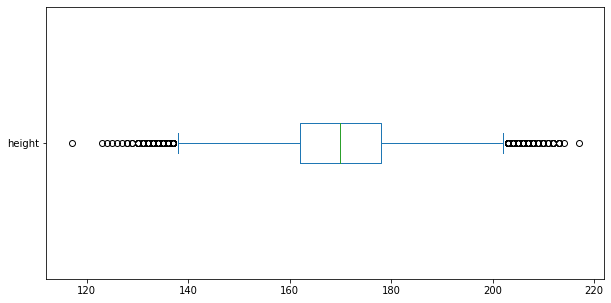

In [52]:
# 2. A
df['height'].plot(kind='box', vert=False, figsize=(10, 5))
plt.show()

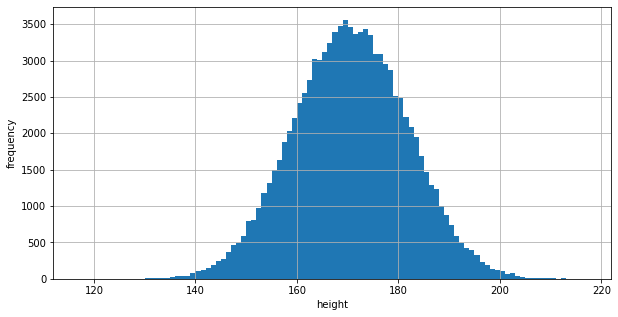

In [53]:
# 2.B
df['height'].hist(bins=100, figsize=(10, 5)),
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

In [54]:
# 3. A
value = 175
mean = df['height'].mean()
std = df['height'].std()
zscore = (value - mean) / std
zscore

0.44203875423510713

In [55]:
# 3. B
from scipy.stats import norm
p = norm.cdf(zscore)
p

0.6707694188039841

In [62]:
# 4.A

male =  df.query('sex == "MALE"')
female =  df.query('sex == "FEMALE"')

total = df['sex'].count()
male_total = male['sex'].count()
female_total = female['sex'].count()

male_p = male_total / total
female_p = female_total / total

male_p, female_p

(0.51112, 0.48888)

In [ ]:
# 4.B
# P(3) = (10 choose 3) * 0.51112^3 * 0.48888^7

# Using a calculator, we can find:

# P(3) = (10! / (3! * 7!)) * 0.51112^3 * 0.48888^7

# P(3) = (10 * 9 * 8 / (3 * 2 * 1)) * 0.51112^3 * 0.48888^7

# P(3) = 0.1069463006

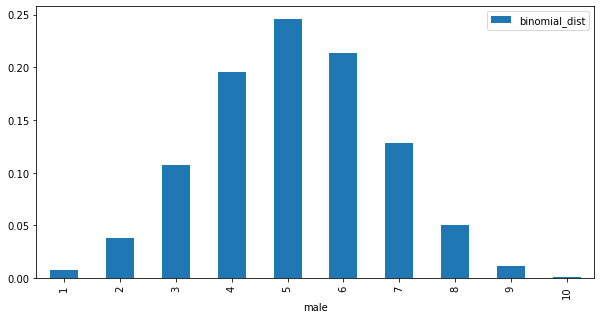

In [70]:
# 4.C
from scipy.stats import binom

n = 10
p = 0.51112

data = {'male': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)
df['binomial_dist'] = [binom.pmf(k, n, p) for k in df['male']]
df.plot(x='male', y='binomial_dist', kind='bar', figsize=(10, 5))
plt.show()